
Läser från Desktop




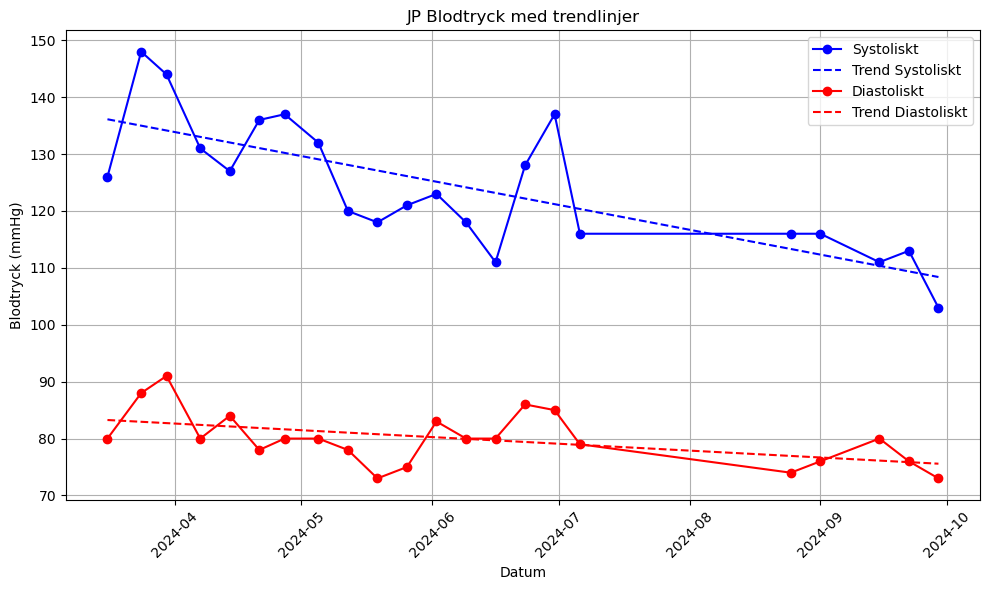

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import date2num

print("\nLäser från Desktop\n\n")
person = 'JP'  
# person = 'Pat'

# Load the provided CSV file
file_path = "~/Desktop/Nattokinase_effekt.csv"
df = pd.read_csv(file_path, skiprows=4)

# Extract relevant columns (date, systolic/diastolic)
df = df[['Datum', 'Systoliskt', 'Distoliskt', 'Systoliskt.1', 'Distoliskt.1']].dropna()

if person == 'JP':  
    df.columns = ['Datum', 'Systoliskt', 'Diastoliskt', 'Systoliskt2', 'Diastoliskt2']
elif person=='Pat':
    df.columns =  ['Datum', 'Systoliskt1', 'Diastoliskt1', 'Systoliskt', 'Diastoliskt']
else:
    raise ValueError("Invalid person. Choose either 'Pat' or 'JP'.")

# Convert 'Datum' to datetime
df['Datum'] = pd.to_datetime(df['Datum'])

# Ensure that the blood pressure columns are numeric
df['Systoliskt'] = pd.to_numeric(df['Systoliskt'], errors='coerce')
df['Diastoliskt'] = pd.to_numeric(df['Diastoliskt'], errors='coerce')

# Plot Systolic and Diastolic with trendline
plt.figure(figsize=(10, 6))

# Convert dates to numbers for trendline calculation
dates_num = date2num(df['Datum'])

# Plotting systolic
plt.plot(df['Datum'], df['Systoliskt'], label='Systoliskt', marker='o', linestyle='-', color='blue')
z_systolic = np.polyfit(dates_num, df['Systoliskt'], 1)
p_systolic = np.poly1d(z_systolic)
plt.plot(df['Datum'], p_systolic(dates_num), color='blue', linestyle='--', label='Trend Systoliskt')

# Plotting diastolic
plt.plot(df['Datum'], df['Diastoliskt'], label='Diastoliskt', marker='o', linestyle='-', color='red')
z_diastolic = np.polyfit(dates_num, df['Diastoliskt'], 1)
p_diastolic = np.poly1d(z_diastolic)
plt.plot(df['Datum'], p_diastolic(dates_num), color='red', linestyle='--', label='Trend Diastoliskt')

# Formatting the plot
plt.title(person+' Blodtryck med trendlinjer')
plt.xlabel('Datum')
plt.ylabel('Blodtryck (mmHg)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
